# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

In [74]:
### Imports
import pandas as pd
import numpy as np
from sklearn import preprocessing

### 1. EDA (exploratory data analysis) (1 punt)

Abans de res cal sempre veure com es la base de dades asignada?

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
* Com es el target, quantes categories diferents existeixen?
* Tenim nans en les dades?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?


### Anàlisi de dades

In [75]:
# Llegim la base de dades
df = pd.read_csv('train.csv')

# Obtenim el numero d'atributs
num_atr = df.shape[1]

# Veiem quants atributs te el nostre csv
print(f"La nostra base de dades té {num_atr} atributs.")

La nostra base de dades té 12 atributs.


Veiem doncs que la nostra base de dades disposa de 12 atributs, els quals tenen els següents noms:


In [76]:
atributos = df.columns.tolist()

print(f"Els noms dels atributs son: ")
for nombre in atributos:
    print(nombre)

Els noms dels atributs son: 
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


Ara ens interesa saber el tipus de dades que guarden aquests atributs

In [77]:
atr_type = df.dtypes

print(f"Els tipus de dades dels atributs son:\n{atr_type}.")

Els tipus de dades dels atributs son:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object.


Ara ens interesa saber com es el target i quantes categories diferents existeixen:
Despres de veure la base de dades, podem deduir que el nostre target a analitzar és la columna "Survived", la qual ens indica si el passatger va sobreviure (1) o no (0), veiem també que les diferents categories possibles(2) son 0, no sobreviu, 1 sobreviu.

In [78]:
num_categories_survived = df['Survived'].nunique()

print(f"El numero de categories que te l'atribut 'Survived' és: {num_categories_survived}")

El numero de categories que te l'atribut 'Survived' és: 2


Executant el codi python anterior, veiem que la nostra deducció de possibles valors categorics es correcte, i son 2.

Ara hem de determinar si la nostra base de dades te o no nans, això ho fariem de la següent manera:

In [79]:
df_nans = df.isna().any().any()

if df_nans:
    print(f"La base de dades té nans.")
else:
    print(f"La base de dades no té nans.")

La base de dades té nans.


Ara hem de veure si hi ha alguna corelació entre X i Y a la hora de determinar l'atribut "Survived".

In [80]:
# Replicamos la base de datos eliminando las columnas que no nos interesan.
dataset_corr = df.copy()
useless_columns = []

for f in dataset_corr:
    if f == 'Name' or f == 'Ticket' or f == 'Cabin':
        useless_columns.append(f)

dataset_corr.drop(useless_columns, axis='columns', inplace=True)

Eliminamos las columnas Name , Ticket y Cabin por los motivos que especificamos a continuación:
- Name: La eliminamos puesto que es un indicador del nombre del pasajero y no es relevante.
- Ticket: La eliminamos puesto que es un indicador del ticket del pasajero y no es relevante.
- Cabin: La eliminamos puesto que es un indicador de la cabina de cada pasajero y tampoco es relevante.


In [81]:
# Convertimos los valores de sex a 0 y 1. ( codificación one-hot )
df_encoded = pd.get_dummies(dataset_corr, columns=['Sex'], drop_first=True)

# Convertimos los valores de Embarked.
#maping = {'C' : 0 , 'Q': 1, 'S' : 2}
#df_encoded['Embarked_numeric'] = df_encoded['Embarked'].map(maping)
#df_encoded = df_encoded.drop(columns=['Embarked'])

# enc = preprocessing.OrdinalEncoder()
# encoded_data = enc.fit_transform(df_encoded['Embarked'])
# df_encoded['Embarked'] = encoded_data

df_encoded = pd.get_dummies(df_encoded, columns=['Embarked'], drop_first=False)

El codigo de arriba en primer lugar, eliminar la columna 'Sex', creando una llamada 'Sex_male', la cual es 1 si el usuario es hombre y 0 si mujer, de esta manera podremos calcular la correlación con 'Survived'. En segundo lugar, hemos eliminado la columna 'Embarked', creando la columna 'Embarked_numeric', que sustituie los valores C, Q y S, por 0, 1, 2 respectivamente, consiguiendo así poder calcular la correlación.
A continuación se muestra como queda la base de datos.

In [82]:
print(df_encoded)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0              1         0       3  22.0      1      0   7.2500      True   
1              2         1       1  38.0      1      0  71.2833     False   
2              3         1       3  26.0      0      0   7.9250     False   
3              4         1       1  35.0      1      0  53.1000     False   
4              5         0       3  35.0      0      0   8.0500      True   
..           ...       ...     ...   ...    ...    ...      ...       ...   
886          887         0       2  27.0      0      0  13.0000      True   
887          888         1       1  19.0      0      0  30.0000     False   
888          889         0       3   NaN      1      2  23.4500     False   
889          890         1       1  26.0      0      0  30.0000      True   
890          891         0       3  32.0      0      0   7.7500      True   

     Embarked_C  Embarked_Q  Embarked_S  
0         False       False      

Una vez hemos hecho las modificaciones pertinentes a nuesta base de datos, ya podemos caluclar la correlación con la variable 'Survived'.

In [83]:
new_names = df_encoded.columns.to_list()

corr = {}
for name in new_names: 
    if name == 'Survived' or name == 'PassengerId':
        pass
    else:
        corr_value = df_encoded['Survived'].corr(df_encoded[name])
        corr[name] = corr_value
print(corr)

{'Pclass': -0.3384810359610148, 'Age': -0.07722109457217755, 'SibSp': -0.035322498885735576, 'Parch': 0.0816294070834836, 'Fare': 0.2573065223849622, 'Sex_male': -0.5433513806577547, 'Embarked_C': 0.16824043121823296, 'Embarked_Q': 0.0036503826839719864, 'Embarked_S': -0.15566027340439323}


Una vez tenemos los resultados pasamos a analizarlos:
- Pclass: -0,338
    - Esta correlación es negativa y moderadamente fuerte. Indica que a medida de que Pclass disminuye ( lo que significa que el pasajero está en una clase mas alta ) la probabilidad de sobrevivir aumenta.
- Age: -0,077
    - Esta correlación es negativa y bastante baja. Lo que indica que a medida que la edad del pasajero aumenta, la probabilidad de sobrebirir del pasajero disminuye ligeramente. Pero como lo correlación es bastante baja podemos deducir que este no es un factor determinante.
- SibSp: -0.035
    - Esta correlación también es negativa y bastante baja. Indica que a medida que el numero de hermanos o cónyuges a bordo aumenta, la probabilidad de sobrevivir disminuye ligeramente. Como la correlación es bastante baja podemos deducir que no es un factor determinante.
- Parch: 0,082
    - Esta correlación es positiva y bastante baja. Indica que a medida que el numero padres o hijos a bordo aumenta, la posibilidad de sobrevivir aumenta ligeramnete. Como la correlación es bastante baja podemos deducir que no es un factor determinante.
- Fare: 0.257
    - Esta correlación es positiva y relativamente fuerte. Indica que a medida que el coste del billete aumenta, la posibilidad de sobrevivir aumente moderadamente. Como esta correlación es moderada podemos deducir que puede ser un factor determinante, puesto que los pasageros que havian pagado mas, quizas tenian prioridad a la hora de ser rescatados.
- Sex_male: -0,543
    - Esta correlación es negativa y fuerte. Indica que a ser del sexo masculino, disminuia drasticamente las posibilidades de sobrevivir, por lo que, las mujeres, tenian prioridad a la hora del rescate. Esta correlación al ser bastante fuerte podemos decir que es un factor determinante de la supervivencia del pasagero.
- Embarked_C: 0,168
    - Esta correlación es positiva y moderadamente baja. Indica que el puerto de embarque C está asociado a la probabilidad de sobrevivir, pero al ser moderadamente baja, no es un factor determinante.
- Embarked_Q: 0,00365
    -  Esta correlación es positiva y muy baja. Indica que el puerto de embarque Q no está asociado a la probabilidad de sobrevivir. 
-  Embarked_S: -0,1557
    -  Esta correlación es negativa y moderadamente baja. Indica que el puerto de embarque S está asociado a la probabilidad de sobrevivir, pero al ser baja, no es un factor determinante.


Una vez hemos analizado la correlación, necesitamos saber si las etiquetas están balanceadas y si puede afectar a la clasificación de su distribución.


In [84]:
survived_count = df_encoded['Survived'].value_counts()
total_inst = len(df_encoded)

print(survived_count)

Survived
0    549
1    342
Name: count, dtype: int64


Con la ejecución previa, podemos ver que no hay una diferencia muy grande entre los pasajeros que sobrevivieron y los que no, aunque eso si, hay mas pasajeros que no sobrevivieron. 
Podemos deducir que la deducción de las etiquetas puede afectar a su clasificación. Puesto que, en nuestro caso como favorecen las instancias de que los pasajeros no sobreviven nuesto modelo puede empezar a favorecer esta clase y no ser tan precisos.

### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
* Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

#### Pregunta 1
¿Están los datos normalizados? ¿Tendríamos que hacerlo?

En nuestra base de datos original, los datos no están normalizados, para que los datos estén normalizados, todas las características deberían estar en una escala similar.
Esto sirve ya que en nuestro modelo puede tomar como referencia los valores mas altos de diferentes categorias y de esta manera entrenarse de manera erronea.

In [85]:
### Codigo de normalización ###
#df_normal = preprocessing.normalize(df_encoded, norm="l1")


Este código lo que hace es normalizar nuestra base de datos, peró no se está ejecutando correctamente puesto que nuestra base de datos contiene nans, por lo que a continuación vamos a gestionar los nans y luego normalizaremos nuestra base de datos.

#### Pregunta 2
¿En caso de normalizarlas, qué tipo de normalización tenemos/hemos usado?

#### Pregunta 3
¿Hay varios datos sin valores(nans)? Como afecta la clasificación si los filtramos? Como lo hariamos?

Para ver si nuestra base de datos modificada tiene nans ejecutariamos el siguiente código:

In [86]:
df_encoded_nans = df_encoded.isna().sum().sum()
print(df_encoded_nans)

177


Vemos que si tenemos nans en nuestra tabla por lo que ahora vamos a analizarlos des del punto de vista de las filas y de las columnas.

In [87]:
### Nans por porcentage de filas.
percent_nan_row = df_encoded.isna().mean(axis=1)
print(percent_nan_row)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
886    0.000000
887    0.000000
888    0.090909
889    0.000000
890    0.000000
Length: 891, dtype: float64


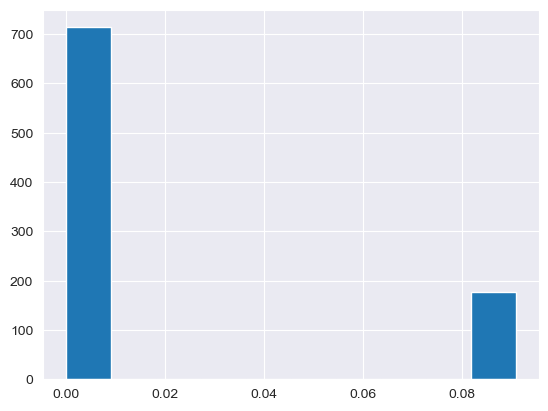

In [88]:
### Para verlo mejor haremos un histograma
import seaborn as sns
import matplotlib.pylab as plt

plt.hist(percent_nan_row)
plt.show()

In [89]:
### Nans por porcentage de columna
percent_nan_column = df_encoded.isna().sum().sort_values()/len(df_encoded)*100.

print(percent_nan_column)

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
SibSp           0.00000
Parch           0.00000
Fare            0.00000
Sex_male        0.00000
Embarked_C      0.00000
Embarked_Q      0.00000
Embarked_S      0.00000
Age            19.86532
dtype: float64


Vemos en el print anterior que la mayoria de nans de la tabla se ven ubicados en la columna "Age", por lo que tenemos que analizar como vamos a tratar este caso.

In [90]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN ,strategy='mean')
df_nans = imp.fit_transform(df_encoded)

# Reconstruir DataFrame con los nombres de las columnas
df_nans = pd.DataFrame(df_nans, columns=df_encoded.columns)

print(df_nans)
print(df_nans.isna().sum().sum() > 0)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  \
0            1.0       0.0     3.0  22.000000    1.0    0.0   7.2500   
1            2.0       1.0     1.0  38.000000    1.0    0.0  71.2833   
2            3.0       1.0     3.0  26.000000    0.0    0.0   7.9250   
3            4.0       1.0     1.0  35.000000    1.0    0.0  53.1000   
4            5.0       0.0     3.0  35.000000    0.0    0.0   8.0500   
..           ...       ...     ...        ...    ...    ...      ...   
886        887.0       0.0     2.0  27.000000    0.0    0.0  13.0000   
887        888.0       1.0     1.0  19.000000    0.0    0.0  30.0000   
888        889.0       0.0     3.0  29.699118    1.0    2.0  23.4500   
889        890.0       1.0     1.0  26.000000    0.0    0.0  30.0000   
890        891.0       0.0     3.0  32.000000    0.0    0.0   7.7500   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1.0         0.0         0.0         1.0  
1         0.0         1.0      

Para solucionar el problema de los nans, hemos usado una tecnica llamada 'Univariate' (univariado), la cual se basa en rellenar los valores nans con una variable predefinida.
En nuestro caso hemos rellenado los nans con la media de cada columna, para no poner un valor predefinido que pueda facilitar el entrenamiento de la máquina.
Para ver si esta solución es correcta vamos a calcular la correlación de la columna 'Age', que es la que tiene mas Nans, con 'Survived' para ver si la correlación se mantiene o no varia demasiado.

In [91]:
corr_age_without_nans = df_nans['Survived'].corr(df_nans['Age'])
print(f"Correlación antes de quitar los nans: {corr['Age']} \nCorrelación despues de quitar los nans: {corr_age_without_nans}")

Correlación antes de quitar los nans: -0.07722109457217755 
Correlación despues de quitar los nans: -0.06980851528714307


Vemos que la correlación se mantiene muy parecida por lo que podemos decir que la manera en la que hemos rellenado los nans es correcta.

Una vez ya no tenemos nans en nuestra base de datos / tabla, podemos aplicar la normalización de los valores de esta como haciamos antes.

In [92]:
### Función para volver a crear la tabla correctamente.
def rebuild_data_frame(df_new, df_original):
    return pd.DataFrame(df_new, columns=df_original.columns)


Los valores que queremos normalizar son los de las columnas: 'Age' y 'Fare', ya que son los mas grandes y los que pueden hacer que confundir a la estadística.
La siguiente función se encarga de normalizar las columnas que pasemos por parámetro.

In [93]:
### Función para normalizar columnas ###
def normalize_column(df):
    min_max = preprocessing.MinMaxScaler()
    normalized_data = min_max.fit_transform(df[['Age', 'Fare']])
    df[['Age', 'Fare']] = normalized_data
    return df

df = normalize_column(df_nans)
print(df.head())

   PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  \
0          1.0       0.0     3.0  0.271174    1.0    0.0  0.014151       1.0   
1          2.0       1.0     1.0  0.472229    1.0    0.0  0.139136       0.0   
2          3.0       1.0     3.0  0.321438    0.0    0.0  0.015469       0.0   
3          4.0       1.0     1.0  0.434531    1.0    0.0  0.103644       0.0   
4          5.0       0.0     3.0  0.434531    0.0    0.0  0.015713       1.0   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


Como vemos a continuación, ejecutando el codigo anterior, ya hemos normalizado los valores de las columnas 'Age' y 'Fare', haciendo que esten entre los valores 0 y 1.

#### Pregunta 4
¿Tenemos datos categoricos y cual sería la mejor codificación?

In [94]:
print(df.head())

   PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  \
0          1.0       0.0     3.0  0.271174    1.0    0.0  0.014151       1.0   
1          2.0       1.0     1.0  0.472229    1.0    0.0  0.139136       0.0   
2          3.0       1.0     3.0  0.321438    0.0    0.0  0.015469       0.0   
3          4.0       1.0     1.0  0.434531    1.0    0.0  0.103644       0.0   
4          5.0       0.0     3.0  0.434531    0.0    0.0  0.015713       1.0   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


Como vemos no disponemos de variables categoricas puesto que anteriormente, para calcular la correlación entre las diferentes variables, hemos convertido estas variables categoricas a valores numericos usando una codificación one-hot.

#### Pregunta 5
¿Podriamos sacar algun atributo extra de las categorias?

Sacar atributosextra de las categorias significa crear nuevas características a partir de los datos existentes. Esto puede ayudar a mejorar el rendimiento del modelo.
En nuestro contexto podríamos crear una nueva categoria como 'Rango de Edad', que indique si el usuario es: 'niño', 'adolescente', 'aduto' o 'anciano'. Esto nos interesaría hacerlo con una variable que esté bastante correlacionada con la variable 'Survived' como, 'Fare' y 'Sex_male'.
En 'Sex_male' no interesa extrar atributos extra ya que por si sola ya es suficientemente útil. En canvio en 'Fare' nos podría interesar intentar extrar algun atributo extra para mejorar el modelo.

Finalmente optamos por no extraer ninguna atributo extra ya que nuestra base de datos al ser suficiente pequeña no es necesario.

#### Pregunta 6

Tendriamos que usar PCA? Que beneficios nos proporcionaría?

PCA (Principal Component Analysis), es una técnica para analizar grandes conjuntos de datos, que contienen un alto numero de dimensiones/características por observación, aumentando la interpretabilidad de los datos al tiempo que se consigue preservar la maxima cantidad de información y permite la visualización de datos multidimensionales.

El uso de PCA en general ayudaría a:
- Reducir la dimensión de nuestros datos.
- Reducir la complejidad computacional del modelo, haciendo que nuestro modelo se ejecute mas rápido.
- Eliminar ruido y comprimir datos.

Explicamos los beneficios de PCA en general, puesto que en nuestro modelo no es necesario aplicarlo. Esto se debe a que no tenemos un gran número de variables en nuestra tabla y ya disponemos de las variables clave que están relacionadas con nuestra variable objetiva 'Survived'.

#### Pregunta 7
¿Necesitariamos aplicar alguna tecnica de selección de features? ¿Lo en veis necesario?

Sabemos que las variables, 'Sex_male' y 'Pclass' son las que tienen una correlación más fuerte con nuestra variable objetivo 'Survived', por lo que a primera vista podríamos pensar que no hace falta aplicar una técnica de selección de features. La contraparte de esta afirmación, es que la correlación solo mide las relaciones lineales entre variables, por lo que es posible que existan relaciones no lineales entre nuestras variables y la variable objetivo. También hay que recalcar que puede ser que exista una combinación de características que nos dé más información que estas dos variables solas.

Por lo que, una vez que hemos visto esto, podríamos pensar en aplicar, por ejemplo, RFE, eliminación recursiva de características, PCA...

Aunque no nos es necesario puesto que disponemos de muy pocas variables y la dificultat de calcular la correlación no lineas es muy elevada para nuestro modelo.

#### Pregunta 8
Se pueden aplicar PlynominalFeatures para mejorar la clasificación? En que modelos tiene sentido hacerlo?

PolynominalFeatures es util en modelos lineales cuando los datos no son lineales. Se agregan dimensiones para convertir el problema no lineal en lineal. Por lo que de esta manera conseguimos captar relaciones no lineales.

Consideramos que no es necesario, puesto que si lo usaramos aumentariamos en gran medida el numero de variables de nuestro modelo, lo que nos llevaria a un sobreajuste y un mayor tiempo de entrenamiento de nuestro modelo.

### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica (no cal separar train-test) i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats . Aquestes funcions ens serviran mes endevant. Caldra tambe triar la metrica que farem servir despres per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?
* Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

Nota: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'unic que es valora es l'eleccio de la metrica de classificacio aixi com saber quin tipus de grafiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la metrica d'error que es fara servir, i es una decisio que cal pendre previa a entrenar models

Las métricas de clasificacion son medidad que se utilizan para evaluar el rendimiento de un modelos de aprendizaje automático en tareas de clasificación. De estas hay diferentes tipos:
* Matriz de confusión.
* Accuracy.
* Recall.
* Curva ROC y AUC.

Accuracy Score:
* Esta métrica mide la proporción de predicciones correctas hechas por el modelo sobre el total de predicciones. Es una buena opción si las clases están balanceadas. ( disponemos de la misma cantidad de ejemplos de cada clase )

F1 Score:
* Esta métrica combina la precisión y el recall en una sola medida. Es útil cuando tenemos un conjunto de datos desbalanceados y nos preocupan los falsos negativos y falsos positivos.

Average Precision Score:
* Esta métrica resume la curva de precisión-recall, que muestra la precisión del modelo para diferentes ubrales de decisión. Es util si tenemos los datos desbalanceados.

In [95]:
print(survived_count)

Survived
0    549
1    342
Name: count, dtype: int64


Vemos que nuestros datos están ligeramente desbalanceados, por lo que nos interesa usar las métricas:
* Average Precision Score.

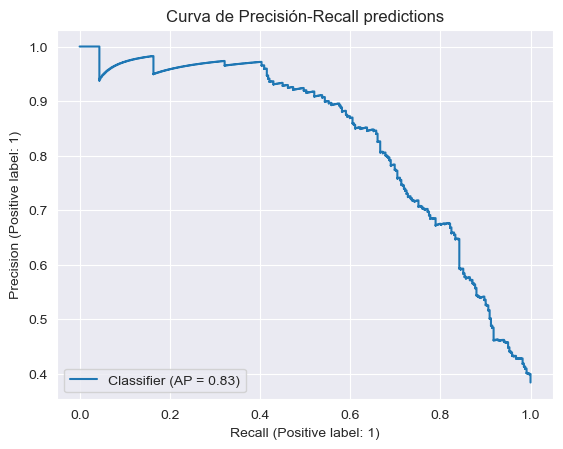

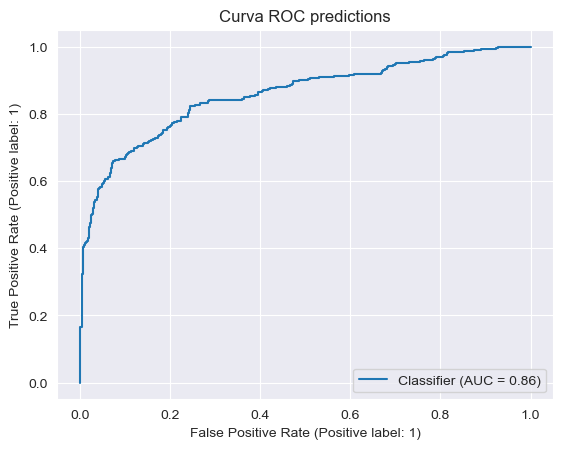

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

X = df.drop('Survived', axis=1)
y = df['Survived']

# Entrenem la regressió logística
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Prediccions
y_pred = model.predict(X)


# Curva de Precisió-Recall
def plot_precision_recall_from_predictions(model, X, y):
    y_score = model.predict_proba(X)[:, 1]
    disp = PrecisionRecallDisplay.from_predictions(y, y_score)
    disp.ax_.set_title('Curva de Precisión-Recall predictions')
    plt.show()

# Curva ROC
def plot_roc_curve_from_predictions(model, X, y):
    y_score = model.predict_proba(X)[:, 1]
    disp = RocCurveDisplay.from_predictions(y, y_score)
    disp.ax_.set_title('Curva ROC predictions')
    plt.show()
plot_precision_recall_from_predictions(model, X, y)
plot_roc_curve_from_predictions(model, X, y)


Para nuestro dataset es mas relevante el gráfico de Curva de Predicción-Recall, puesto que con esta trabajamos con datos desbalanceados, y nos importan mas los falsos positivos, que los falsos negativos. 

In [97]:
### Ex 3
# Anàlisi de resultats
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       549
         1.0       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891


En nuestro modelo, nos interesaría usar la precición, puesto que nos importan mas los falsos positivos que los falsos positivos. Además, nos permite trabajar con datos desbalanceados.

### 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)


##### ¿Que modelos hemos considerado?¿Porqué los hemos escogido?
Hemos escogido los modelos: Regresión Logística, Random Forest, KNN y SVM.
Hemos escogido cada un por las ventajas que nos aportan:
* Regresión Logística:
    * Es un algoritmo simple y eficiente que nos permite manejar variables numericas y categoricas. Proporcionándonos probabilidades de los resultados a obtener que pueden ser utiles a la toma de decisiones.  
* Random Forest:
    * Es uno de los algoritmos de aprendizaje mas precisos que existen. Aunque funciona mejor cuanto mas grande sea nuestro conjunto de datos, trabajar con este algoritmo nos permitirá probar este modelo bastante preciso.
* KNN (K-Nearest Neighbors): 
    * Es un algoritmo sencillo que no requiere de demasiado entrenamiento. Es un algoritmo de aprendizaje supervisado y simple que se utiliza para resolver problemas de clasificación y regresión.
* SVM (Support Vector Machine):
    * Es un conjunto de algoritmos de aprendizaje supervisados que se centran en los problemas de clasificación y regresión.

En nuestro modelo estamos usando la metrica "Average Precision Score".

### 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

* Com creieu que es podria millorar el vostre model?